# <CENTER> PRACTICA DE LOGICA DIFUSA EN SISTEMAS EXPERTOS</CENTER>


ACTIVIDADES POR DESARROLLAR

En un galpón se tiene una temperatura de 18 grados centígrados, y una humedad de aproximadamente 22 grados centígrados. Según estos valores determinar cual es la velocidad que debería estar funcionando el motor.
Para revisar las reglas, función de pertinencia y el proceso  revisar el siguiente link: https://medium.com/@javierdiazarca/l%C3%B3gica-difusa-ejercicio-2-bases-de-la-ia-1a8ae594cc15

En base a ello,  desarrollar e implementar el sistema dentro de Python o Java en donde me permita modificar los valores de la temperatura y humedad, generando así un sistema experto basado en lógica difusa para obtener la velocidad del motor de aire acondicionado.

Este sistema deberá tener la opción de poder modificar los valores de la temperatura y humedad con un scroll bar y obtener la velocidad de giro. Ademas, deberá presentarme las graficas de pertenencia de INPUT/OUPUT del sistema difuso y como estas varían de acuerdo al cambio de las variables.


Nota: Esta practica remplazara la segunda prueba con los siguientes criterios de evaluación:


•	GUI: 40%

•	FUZZY LOGIC: 40%

•	informe y pruebas: 20%


Subir el informe en formato PDF y los códigos fuentes al repositorio Git personal.



# DESARROLLO

Implementacion de codigo fuente en python para obtener las graficas con sus respectivos 

/Users/zhimi/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/zhimi/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/zhimi/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


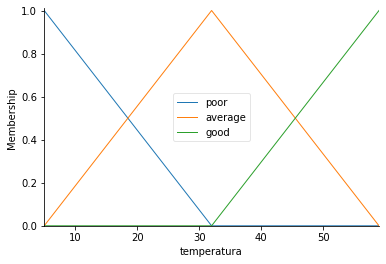

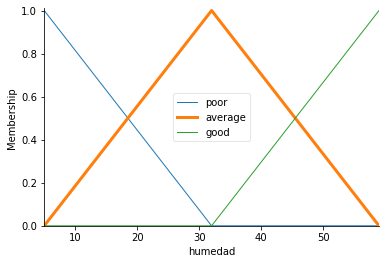

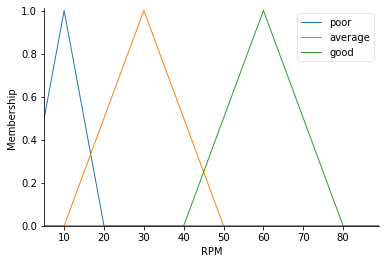

In [54]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperatura = ctrl.Antecedent(np.arange(5, 60, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(5, 60, 1), 'humedad')
RPM = ctrl.Consequent(np.arange(5, 90, 1), 'RPM')

# Auto-membership function population is possible with .automf(3, 5, or 7)
temperatura.automf(3)
humedad.automf(3)

# Pythonic API
RPM['poor'] = fuzz.trimf(RPM.universe, [0, 10, 20])
RPM['average'] = fuzz.trimf(RPM.universe, [10, 30, 50])
RPM['good'] = fuzz.trimf(RPM.universe, [40, 60, 80])

temperatura.view()
humedad['average'].view()
RPM.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

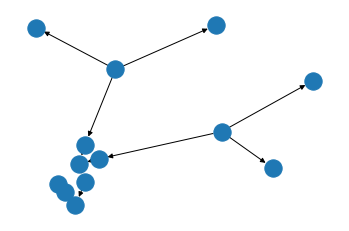

In [55]:
#reglas para temperatura, humedad y motor
rule1 = ctrl.Rule(temperatura['poor'] | humedad['poor'], RPM['poor'])
rule2 = ctrl.Rule(temperatura['average'] | humedad['average'], RPM['poor'])
rule3 = ctrl.Rule(humedad['poor'] | temperatura['average'], RPM['poor'])

rule1.view()


In [59]:
#Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control a través de:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [68]:
# Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al computemétodo.
tipping.input['temperatura'] = 50
tipping.input['humedad'] = 60
tipping.compute()

11.701388888888886


/Users/zhimi/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


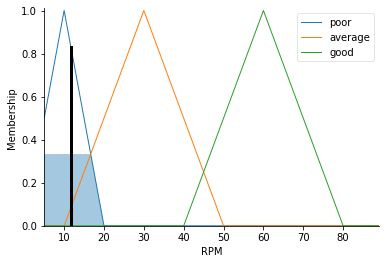

In [69]:
#Una vez calculado, podemos ver el resultado así como visualizarlo.
print (tipping.output['RPM'])
RPM.view(sim=tipping)

### Pruebas:

Cuando la temperatura es 35 grados y la humedad es igual a 40 grados
 
 grafica generada
 
 valor del motor = 10.96
 

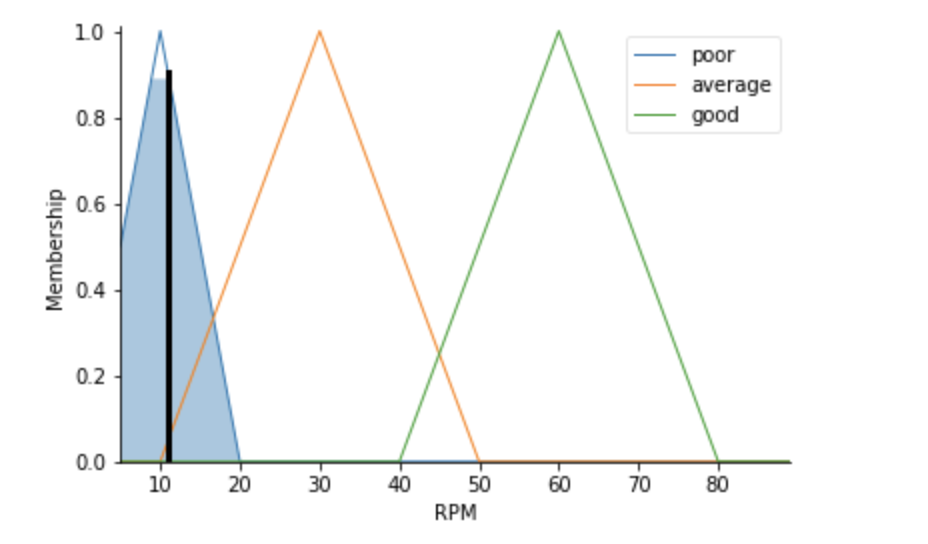
    
  
    

## conclusiones:
    
 El poder de los sistemas difusos es permitir un comportamiento intuitivo y complicado basado en un sistema de reglas